# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [ ]:
# stundent details example: John S. 9812
#                       student details 1: Adi B. 5785
# (if exists)           student details 2: Shir G. 8134

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
במטלה זו בחרנו את מאגר הנתונים Titanic, שמכיל מידע על נוסעים באוניית הטיטניק כגון גיל, מגדר, מחלקת נסיעה, קרובי משפחה על הסיפון, מחיר כרטיס ונמל העלייה. המטרה שלנו לפי ההנחיות היא לבנות מודל של למידה מונחית מסוג סיווג בינארי, שיחזה האם נוסע שרד את ההפלגה (Survived=1) או לא (Survived=0). מאגר הנתונים כולל תכונות שונות (Features) המאפשרות לבדוק האם קיימים קשרים אפשריים בין מאפייני הנוסע לבין סיכויי ההישרדות שלו. מדד האיכות שבו נשתמש להערכת המודל הוא F1 score על המחלקה המרכזית (Survived=1), מאחר שמדובר בבעיית סיווג לא מאוזנת בה חשוב במיוחד לחזות נכון את הנוסעים ששרדו.



    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [18]:
# טעינת ספריות 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# טעינת קבצי train ו-test
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")


In [ ]:
# של הצגת 5 שורות ראשונות 
train.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [14]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


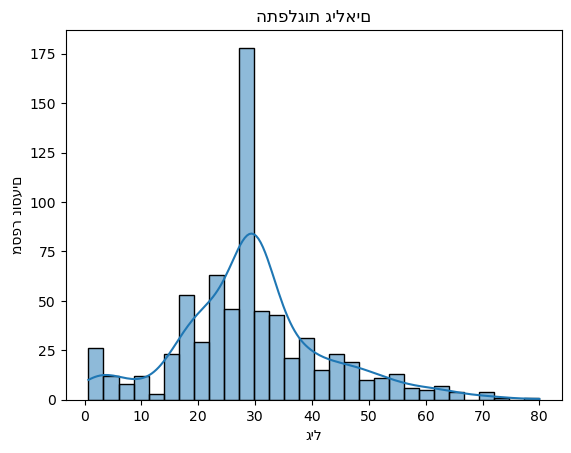

In [19]:
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title("התפלגות גילאים")
plt.xlabel("גיל")
plt.ylabel("מספר נוסעים")
plt.show()



גרף זה מציג את ההתפלגות של גילי הנוסעים ומאפשר לראות האם יש קבוצות גיל בולטות יותר, לדוגמה ילדים או מבוגרים. גרף זה מציג את ההתפלגות של גילי הנוסעים בטיטניק. ניתן לראות שהרוב המוחלט של הנוסעים היו בגילים צעירים עד בינוניים, עם ריכוז גדול יחסית סביב שנות ה־20 לחיים, בעוד שיש גם מספר ילדים ומבוגרים מבוגרים יותר. מידע זה עוזר להבין את פרופיל הגילים הכללי של הנוסעים.


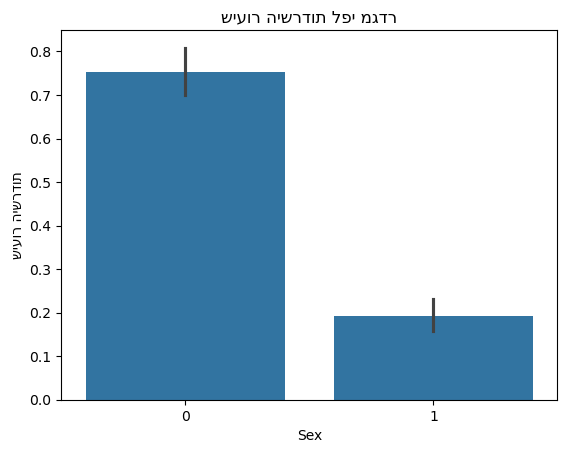

In [20]:
sns.barplot(x="Sex", y="Survived", data=train)
plt.title("שיעור הישרדות לפי מגדר")
plt.ylabel("שיעור הישרדות")
plt.show()


כאן אנו רואים את שיעור ההישרדות לפי מגדר, כדי לבדוק האם לנשים היה סיכוי גבוה יותר לשרוד מהגברים.בגרף זה ניתן לראות בבירור את ההבדל בשיעור ההישרדות בין נשים לגברים. נשים שרדו בשיעור גבוה בהרבה, דבר שעולה בקנה אחד עם ההיסטוריה של הטיטניק בה נשים וילדים זכו לעדיפות בעת הפינוי. תוצאה זו מראה שמגדר הוא משתנה משמעותי מאוד בחיזוי ההישרדות.


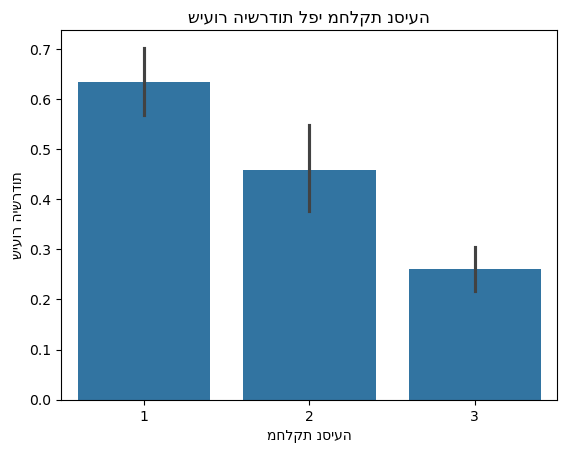

In [21]:
sns.barplot(x="Pclass", y="Survived", data=train)
plt.title("שיעור הישרדות לפי מחלקת נסיעה")
plt.xlabel("מחלקת נסיעה")
plt.ylabel("שיעור הישרדות")
plt.show()


הגרף מציג את שיעור ההישרדות לפי מחלקת הנסיעה (1, 2, 3) ובודק האם לנוסעים במחלקות גבוהות היה יתרון. הגרף מציג את שיעור ההישרדות של נוסעים לפי מחלקת הנסיעה. ניתן לראות שנוסעים במחלקה הראשונה שרדו בשיעור גבוה יותר, בעוד שנוסעי המחלקה השלישית היו בעלי סיכוי נמוך יותר לשרוד. ממצא זה מצביע על כך שמעמד חברתי וכלכלי, כפי שהוא מתבטא במחלקת הנסיעה, היה גורם משפיע בהישרדות.


In [22]:
# טבלת ציר של שיעור ההישרדות לפי מגדר ולפי מחלקה
pivot_survival = (
    train.pivot_table(index="Sex", columns="Pclass", values="Survived", aggfunc="mean")
    .round(3)
)
pivot_survival


Pclass,1,2,3
Sex,,,
0,0.962,0.902,0.538
1,0.380,0.141,0.140


הטבלה מציגה את שיעור ההישרדות הממוצע לפי מגדר ולפי מחלקת נסיעה, והיא מאפשרת לראות במבט אחד שלנשים יש שיעור הישרדות גבוה יותר ובמחלקות גבוהות הסיכוי לשרוד עולה.

## Part 3 - Experiments
You could add as many code cells as needed

In [25]:
#ייבוא הספריות

import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score

In [26]:
# עמודת המטרה
target_col = "Survived"

# הגדרת מסגרות האימון
# שים לב: לא מסירים PassengerId או Ticket כי הן לא קיימות בקבצים שלך
X = train.drop(columns=[target_col]).copy()
y = train[target_col].copy()

# רשימות עמודות לפי סוג
numeric_features = ["Age", "SibSp", "Parch", "Fare"]
categorical_features = ["Pclass", "Sex", "Embarked"]  # מקודדות כמספרים אבל נקודד לוואן-הוט

In [27]:
# צנרת מספרית עם אפשרות לסקיילינג ובחירת תכונות
num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),          # יוחלף לגרסאות אחרות או יבוטל דרך הגריד
    ("kbest", "passthrough")               # יוחלף ל SelectKBest דרך הגריד
])

In [28]:
# צנרת קטגורית: איפוט וקידוד וואן הוט
cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [29]:
# טרנספורמר מאוחד
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, numeric_features),
        ("cat", cat_pipe, categorical_features)
    ]
)

In [30]:
# צנרת כללית: עיבוד מוקדם ואז מסווג
pipe = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", LogisticRegression(max_iter=1000))
])

# ציון המטרה
scorer = make_scorer(f1_score)  # המחלקה החיובית היא 1 ולכן מתאים

In [31]:

# מרחב החיפוש
param_grid = [

    # רגרסיה לוגיסטית
    {
        "prep__num__scaler": [StandardScaler(), MinMaxScaler(), "passthrough"],
        "prep__num__kbest": ["passthrough",
                             SelectKBest(score_func=f_classif, k=8),
                             SelectKBest(score_func=f_classif, k=12)],
        "clf": [LogisticRegression(max_iter=1000)],
        "clf__C": [0.1, 1.0, 10.0],
        "clf__solver": ["liblinear", "lbfgs"]
    },

    # יער אקראי
    {
        "prep__num__scaler": [StandardScaler(), MinMaxScaler(), "passthrough"],
        "prep__num__kbest": ["passthrough",
                             SelectKBest(score_func=f_classif, k=8),
                             SelectKBest(score_func=f_classif, k=12)],
        "clf": [RandomForestClassifier(random_state=42)],
        "clf__n_estimators": [200, 500],
        "clf__max_depth": [5, 10]
    },

    # סי וי סי
    {
        "prep__num__scaler": [StandardScaler(), MinMaxScaler()],
        "prep__num__kbest": ["passthrough",
                             SelectKBest(score_func=f_classif, k=8)],
        "clf": [SVC()],
        "clf__C": [0.5, 1.0, 2.0],
        "clf__kernel": ["linear", "rbf"]
    }
]

In [32]:
# גריד סרץ עם חמישה קיפולים
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    return_train_score=False
)

grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('kbest',
                                                                                          'passthrough')]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknow...
                          'prep__num__kbest': ['passthrough', SelectKBest(k=8),
                                               SelectKBest(k=12)],
                          'prep__num__scaler': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'clf': [SVC()], 'clf__C': [0.5, 1.0, 2.0],
                          'clf__kernel': ['linear', 'rbf'],
                          'prep__num__kbest': ['passthrough', SelectKBest(k=8)],
                          'prep__num__scaler': [StandardScaler(),
                                                MinMaxScaler()]}],
             scoring=make_scorer(f1_score, response_method='predict'))

In [33]:
# טבלת תוצאות מסודרת
results = pd.DataFrame(grid.cv_results_)
cols_to_show = [
    "mean_test_score",
    "param_prep__num__scaler",
    "param_prep__num__kbest",
    "param_clf",
    "param_clf__C",
    "param_clf__solver",
    "param_clf__n_estimators",
    "param_clf__max_depth",
    "param_clf__kernel"
]
display(results[cols_to_show].sort_values("mean_test_score", ascending=False).head(20))

print("הציון הטוב ביותר:", round(grid.best_score_, 4))
print("הפרמטרים המובילים:")
for k, v in grid.best_params_.items():
    print(k, "=", v)

best_model = grid.best_estimator_

,mean_test_score,param_prep__num__scaler,param_prep__num__kbest,param_clf,param_clf__C,param_clf__solver,param_clf__n_estimators,param_clf__max_depth,param_clf__kernel
72,0.761522,StandardScaler(),passthrough,RandomForestClassifier(random_state=42),NaN,NaN,200.0,10.0,NaN
75,0.761522,StandardScaler(),SelectKBest(k=8),RandomForestClassifier(random_state=42),NaN,NaN,200.0,10.0,NaN
78,0.761522,StandardScaler(),SelectKBest(k=12),RandomForestClassifier(random_state=42),NaN,NaN,200.0,10.0,NaN
86,0.761011,passthrough,SelectKBest(k=8),RandomForestClassifier(random_state=42),NaN,NaN,500.0,10.0,NaN
82,0.761011,MinMaxScaler(),passthrough,RandomForestClassifier(random_state=42),NaN,NaN,500.0,10.0,NaN
89,0.761011,passthrough,SelectKBest(k=12),RandomForestClassifier(random_state=42),NaN,NaN,500.0,10.0,NaN
83,0.761011,passthrough,passthrough,RandomForestClassifier(random_state=42),NaN,NaN,500.0,10.0,NaN
88,0.761011,MinMaxScaler(),SelectKBest(k=12),RandomForestClassifier(random_state=42),NaN,NaN,500.0,10.0,NaN
85,0.761011,MinMaxScaler(),SelectKBest(k=8),RandomForestClassifier(random_state=42),NaN,NaN,500.0,10.0,NaN
74,0.760247,passthrough,passthrough,RandomForestClassifier(random_state=42),NaN,NaN,200.0,10.0,NaN


הציון הטוב ביותר: 0.7615
הפרמטרים המובילים:
clf = RandomForestClassifier(random_state=42)
clf__max_depth = 10
clf__n_estimators = 200
prep__num__kbest = passthrough
prep__num__scaler = StandardScaler()


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

בשלב זה מאמנים מחדש את כל הזרימה עם הקונפיגורציה המובילה שנבחרה בגריד, כולל אותה הנדסת תכונות ואותם היפרפרמטרים, על כל קבוצת האימון.


In [34]:
# המודל המוביל מהגריד כולל את כל שלבי העיבוד והמסווג
final_model = grid.best_estimator_



In [35]:

# אימון מחדש על כל קבוצת ה-train
final_model.fit(X, y)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('kbest',
                                                                   'passthrough')]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('clf',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        random_state=42))])

In [36]:
# תיעוד קצר של ההגדרות שנבחרו
print("Best CV F1:", round(grid.best_score_, 4))
print("Best params:")
for k, v in grid.best_params_.items():
    print(f"{k} = {v}")

Best CV F1: 0.7615
Best params:
clf = RandomForestClassifier(random_state=42)
clf__max_depth = 10
clf__n_estimators = 200
prep__num__kbest = passthrough
prep__num__scaler = StandardScaler()


## Part 5 - Apply on test and show model performance estimation

מיישמים את אותה צנרת על קבוצת המבחן ללא עיבוד ידני, מציגים חמישה חיזויים ראשונים ומחשבים את מדד ה-F1 לקבלת הערכה אובייקטיבית.


In [38]:
from sklearn.metrics import f1_score

# הכנת מסגרת התכונות של ה-test
test_clean = test.copy()
X_test = test_clean.drop(columns=["Survived"])
y_test = test_clean["Survived"]


# חיזוי עם המודל המאומן
test_preds = final_model.predict(X_test)

In [39]:
# חמישה חיזויים ראשונים
print("חמישה חיזויים ראשונים:", test_preds[:5])

# מדד איכות F1 על קבוצת ה-test
f1 = f1_score(y_test, test_preds)
print("F1 על קבוצת ה-test:", round(f1, 4))

חמישה חיזויים ראשונים: [0 0 0 1 1]
F1 על קבוצת ה-test: 0.8103
